# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [5]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


In [6]:
# Analyzing image distribution of each breed categories
dog_breeds = {}

for folder in glob('dogImages/*'):
    breed_data = {}
    for name in glob(folder+'/*'): 
        count = 0
        for i in glob(name+'/*'):
            count+=1
        if folder[10:]=="test":
            breed_data[name[19:]] = count
        else:
            breed_data[name[20:]] = count
    dog_breeds [folder[10:]] = breed_data
    
humans = {}

for folder in glob('lfw/*'):
    count = 0
    for name in glob(folder+'/*'): 
        count+=1
    humans[folder[4:]] = count
    


 Dog Breed Dataset statistical analysis

*** test ***
Mean is :6.285714285714286
Standard deviation is :1.7061209071886712
Balance is : 0.9922429971547768


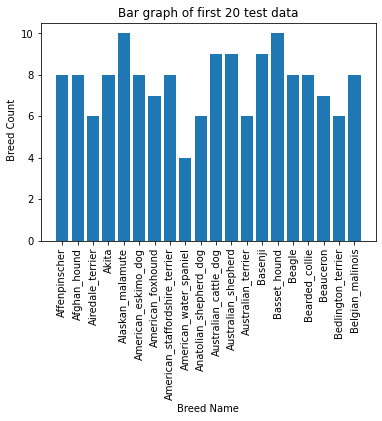





*** train ***
Mean is :50.225563909774436
Standard deviation is :11.819199711692113
Balance is : 0.994175393726035


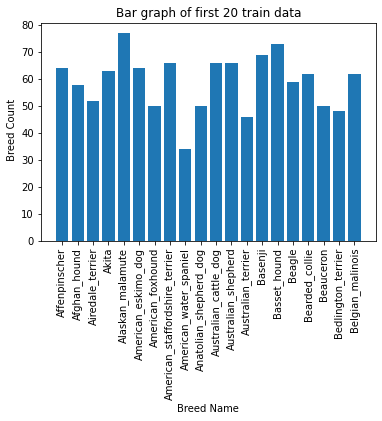





*** valid ***
Mean is :6.2781954887218046
Standard deviation is :1.345297482034222
Balance is : 0.9952115650906471


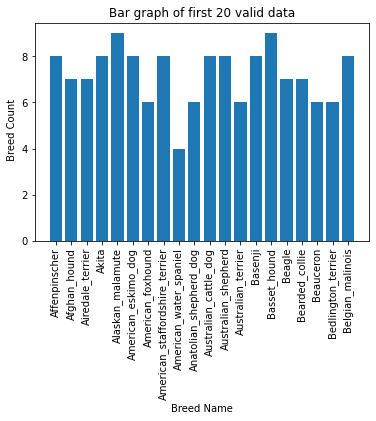

In [7]:
from math import log
import statistics 
import matplotlib.pyplot as plt


def balance_calculator(data) :
    """
    For Calculating dataset balance using shannon diversity index
    args : list of numbers
    return: balance, value from [0,1]
    """
    n = sum(data)
    k = len(data)
    H = -sum([ (count/n) * log((count/n)) for count in data]) #shannon entropy
    return H/log(k)

print("\n Dog Breed Dataset statistical analysis")

for dataset_type, items in dog_breeds.items() :
    breed = list(items.keys())
    breed_count = list(items.values())
    print('\n*** '+dataset_type+' ***')
    print('Mean is :' + str(statistics.mean(breed_count)))
    print('Standard deviation is :' + str(statistics.pstdev(breed_count)))
    print('Balance is : '+str(balance_calculator(breed_count)))
    
    breed_label = breed[:20]
    breed_count = breed_count[:20]
    plt.bar(breed_label,breed_count)
    y_pos = range(len(breed_label))
    plt.xticks(y_pos,breed_label, rotation=90)
    plt.ylabel(" Breed Count")
    plt.xlabel("Breed Name")
    plt.title('Bar graph of first 20 '+dataset_type+' data') 
    plt.show()
    print("\n\n")

In [8]:
print("\n Human face Dataset statistical analysis")
name = list(humans.keys())
pic_count = list(humans.values())

print('Mean is :' + str(statistics.mean(pic_count)))
print('Standard deviation is :' + str(statistics.pstdev(pic_count)))
print('Balance is : '+str(balance_calculator(pic_count)))


 Human face Dataset statistical analysis
Mean is :2.301791615933206
Standard deviation is :9.01562578844871
Balance is : 0.8979802530070555


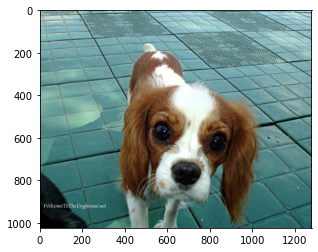

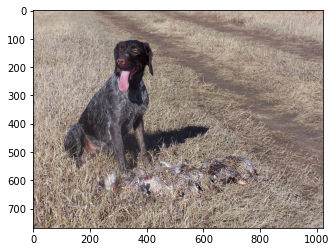

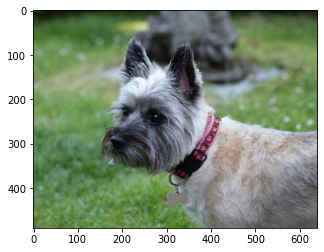

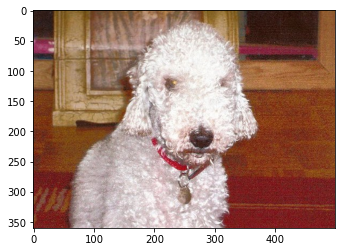

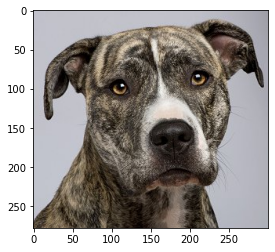

In [9]:
import cv2  

def plot_n_images(files,n):
    """
    Ploting images
    args : files( narray of files)
           n = number of pictures
    o/p  : Return is not applicable, just ploting images
           using matplotlib
    """

    for file in files[:n]:
        img = cv2.imread(file)
        cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(cv_rgb)
        plt.show()

# Showing 4 sample images of human faces
import random

rand_selection = random.sample(range(0,len(dog_files)), 5)

dogs = dog_files[rand_selection]

plot_n_images(dogs,len(dogs))

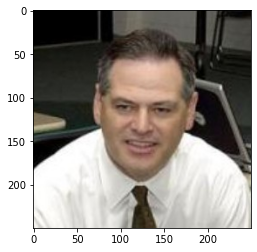

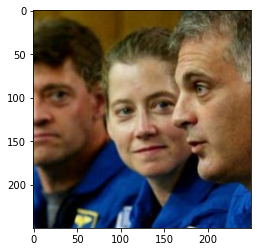

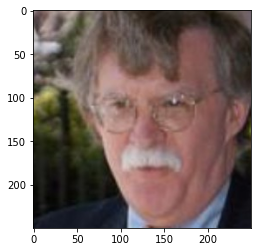

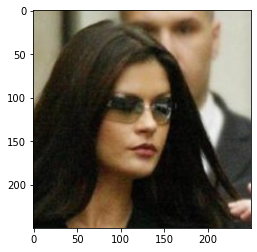

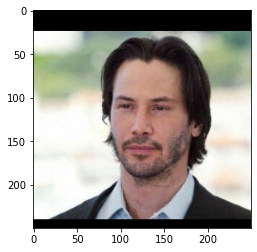

In [20]:
# Showing 5 sample images of human face
rand_selection = random.sample(range(0,len(human_files)), 5)

humans = human_files[rand_selection]

plot_n_images(humans,len(humans))

<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


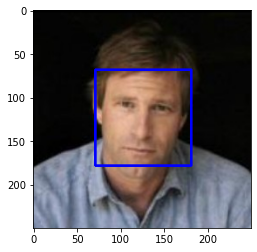

In [21]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [22]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
96.0 % detected human face in human_files 18.0 % detected human face in dog_files

In [23]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
def test_face_detection(img_arrays):
    """
    Args : img_arrays(images)
    Return: Percentage of human face detected
    It calculating how much percentage of human faces are in a set of images
    """
    face_detected = 0;
    for arr in img_arrays:
        face_detected += face_detector(arr)
    return face_detected/len(img_arrays)*100

print("{:.2f} % detected human face in human_files".format(test_face_detection(human_files_short)))
print("{:.2f} % detected human face in dog_files".format(test_face_detection(dog_files_short)))

96.00 % detected human face in human_files
18.00 % detected human face in dog_files


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [24]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [25]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [26]:
from PIL import Image
import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    # Converting image to RGB format
    pre_image = Image.open(img_path).convert('RGB')
    
   # applying image preprocessing
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.5, 0.5, 0.5],[0.5, 0.5, 0.5])
    ])
    
    
    image = transform (pre_image).unsqueeze_(0)

    # Move tensor to GPU if available
    if use_cuda:
        image = image.cuda()
        
    ## Inference
    # Turn on evaluation mode
    VGG16.eval()
    
    # Get predicted category for image
    with torch.no_grad():
        output = VGG16(image)
        prediction = torch.argmax(output).item()
        
    # Turn off evaluation mode
    VGG16.train()
    
    # predicted class index
    return prediction 

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [27]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    prediction_index = VGG16_predict(img_path)
    return prediction_index >=151 and prediction_index <=268

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 
human percentage is: 0.0% dog percentage is: 93.0%

In [28]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
def percentage_calculator(count):
    """
    calculating percentage
    """
    return (np.sum(count)/len(count)) * 100


human_count = [dog_detector(human) for human in human_files_short]
print("human percentage is: " + str(percentage_calculator(human_count))+ "%")

dog_count =[dog_detector(dog) for dog in dog_files_short]
print("dog percentage is: " + str(percentage_calculator(dog_count)) + "%")human percentage is: 1.0% dog percentage is: 100.0%

human percentage is: 0.0%
dog percentage is: 93.0%


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [29]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [30]:
import os
import torch
from torchvision import datasets, transforms

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# Defining base directory
data_dir = 'dogImages'

# Defining transformation properties
resize = transforms.Resize(size=258)
to_tensor = transforms.ToTensor()
center_crop = transforms.CenterCrop(224)
normalize = transforms.Normalize([0.5, 0.5, 0.5],[0.5, 0.5, 0.5])

# Initializing Transformation objects
transform_train_data = transforms.Compose([resize,
                                           transforms.RandomHorizontalFlip(),
                                           transforms.RandomRotation(10),
                                           center_crop,
                                           to_tensor,
                                           normalize
                                          ])

transform_validation_data = transforms.Compose([resize,
                                                center_crop,
                                                to_tensor,
                                                normalize
                                               ])

transform_test_data = transforms.Compose([resize,
                                                center_crop,
                                                to_tensor,
                                                normalize
                                               ])


train_dataset = datasets.ImageFolder(os.path.join(data_dir, 'train'), transform=transform_train_data)
valid_dataset = datasets.ImageFolder(os.path.join(data_dir, 'valid'), transform=transform_validation_data)
test_dataset = datasets.ImageFolder(os.path.join(data_dir, 'test'), transform=transform_test_data)

# Loading dataset
train_loader = torch.utils.data.DataLoader(train_dataset,
                                          batch_size=128,
                                          shuffle=True,
                                          num_workers=0)

valid_loader = torch.utils.data.DataLoader(valid_dataset,
                                          batch_size=128,
                                          shuffle=True,
                                          num_workers=0)

test_loader = torch.utils.data.DataLoader(test_dataset,
                                          batch_size=64,
                                          shuffle=False,
                                          num_workers=0)

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
My input tensor size is 244x244, becuase 244x244 is the compatible input format for ResNet50 .
I applying various transformation over the available images. Resizing,  center cropping, tensor conversion and normalization are common in all of the dataset. We can prevent overfitting in our image data by using augmentation upto a limit, In training data its applying two addtional transformation random flipping and random rotation. 

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [31]:
import torch.nn as nn
import torch.nn.functional as F

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv1 = nn.Conv2d(3, 32, 3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)

        # pool
        self.pool = nn.MaxPool2d(2, 2)
        
        # fully-connected
        self.fc1 = nn.Linear(7*7*128, 500)
        self.fc2 = nn.Linear(500, 133) 
        
        # drop-out
        self.dropout = nn.Dropout(0.3)
    
    def forward(self, x):
        ## Define forward behavior
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = self.pool(x)
        
        # flatten
        x = x.view(-1, 7*7*128)
        
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        
        x = self.dropout(x)
        x = self.fc2(x)
        return x
    
#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 
The CNN has three convolution layers, two fully connected layer and pooling layer of (2,2). The connected layers produce the 133-dimension output. All of the convolution layer has kernel size of 3. Conv 1 and Conv2 have 2 strides, while Conv 3 has only one stride. The Conv3 produces output size 128. We are using relu activation function as activator and for avoiding overfitting we are using a dropout of 0.3. Using cross entropy as loss function and Adam as optimizer with lr = 0.001 while training the model. 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [32]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [33]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))

            # clear gradients of all optimized variables
            optimizer.zero_grad()

            # forwarward pass
            output = model(data)
            
            # calculate batch loss
            loss = criterion(output, target)
            
            # backward pass
            loss.backward()
            
            # perform optimization step
            optimizer.step()
            
            # update training loss
            train_loss += ((1 / (batch_idx + 1)) * (loss.data - train_loss))            

        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            with torch.no_grad():
                output = model(data)
            loss = criterion(output, target)
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
           
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss decreased ({:.6f} --> {:.6f}), Saving model...'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            valid_loss_min = valid_loss
            
    # return trained model
    return model


# define loaders_scratch
loaders_scratch = {'train': train_loader,
                   'valid': valid_loader,
                   'test': test_loader}

# train the model
model_scratch = train(8, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Epoch: 1 	Training Loss: 4.825847 	Validation Loss: 4.634830
Validation loss decreased (inf --> 4.634830), Saving model...
Epoch: 2 	Training Loss: 4.486985 	Validation Loss: 4.350504
Validation loss decreased (4.634830 --> 4.350504), Saving model...
Epoch: 3 	Training Loss: 4.256452 	Validation Loss: 4.227422
Validation loss decreased (4.350504 --> 4.227422), Saving model...
Epoch: 4 	Training Loss: 4.093151 	Validation Loss: 4.127232
Validation loss decreased (4.227422 --> 4.127232), Saving model...
Epoch: 5 	Training Loss: 3.935257 	Validation Loss: 4.029702
Validation loss decreased (4.127232 --> 4.029702), Saving model...
Epoch: 6 	Training Loss: 3.794263 	Validation Loss: 3.951955
Validation loss decreased (4.029702 --> 3.951955), Saving model...
Epoch: 7 	Training Loss: 3.618542 	Validation Loss: 3.879948
Validation loss decreased (3.951955 --> 3.879948), Saving model...
Epoch: 8 	Training Loss: 3.465789 	Validation Loss: 3.883962


<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [34]:
from sklearn.metrics import classification_report



def test(loaders, model, criterion, use_cuda):

     # Initialize the prediction and label lists(tensors)
    pred_list=torch.zeros(0,dtype=torch.long, device='cpu')
    label_list=torch.zeros(0,dtype=torch.long, device='cpu')
    
    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)       
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        
        # convert output probabilities to predicted class
        output = F.softmax(output, dim=1)
        pred = output.data.max(1, keepdim=True)[1]
        
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
        
        
        _, preds = torch.max(output, 1)
        # Append batch prediction results for later calculating the f1-score
        pred_list=torch.cat([pred_list,preds.view(-1).cpu()])
        label_list=torch.cat([label_list,target.view(-1).cpu()])
          
            
    # Use the sklearn module classification_report to get the f1-score average over all classes
    # and also the f1-score for each class
    report = classification_report(label_list.numpy(), pred_list.numpy(), output_dict=True)
    
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))
    
    print('Test F1 score: {:.4f}\n'.format(report['macro avg']['f1-score']))

# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.864309


Test Accuracy: 12% (107/836)
Test F1 score: 0.0932



C:\Users\Ali\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [35]:
## TODO: Specify data loaders
loaders_transfer = loaders_scratch.copy()

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [36]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.resnet50(pretrained=True)

#freeze pretrained model parameters
for param in model_transfer.parameters():
    param.requires_grad = False
    
# resnet classifies 1000 categories, but we want only 133:

model_transfer.fc = nn.Linear(2048, 133)

if use_cuda:
    model_transfer = model_transfer.cuda()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to C:\Users\Ali/.cache\torch\hub\checkpoints\resnet50-19c8e357.pth


__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
Here i'm using ResNet50 for transfer learning. ResNet50 is trained on more than a million images from the ImageNet database.  The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals.The network has an image input size of 224-by-224. After i applying ResNet i got significant improvment in accurecy.

Steps:

1. Import pre-trained resnet50 model
2. We only need 133 out_features, so Change the out_features of fully connected layer to 133
3. Defined cross entopy as loss function
4. Choose optim.SGD as optimizer

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [37]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.SGD(model_transfer.fc.parameters(), lr=0.02)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [38]:
model_transfer = train(10, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 4.475542 	Validation Loss: 3.972176
Validation loss decreased (inf --> 3.972176), Saving model...
Epoch: 2 	Training Loss: 3.584076 	Validation Loss: 3.192433
Validation loss decreased (3.972176 --> 3.192433), Saving model...
Epoch: 3 	Training Loss: 2.888818 	Validation Loss: 2.577814
Validation loss decreased (3.192433 --> 2.577814), Saving model...
Epoch: 4 	Training Loss: 2.356537 	Validation Loss: 2.154267
Validation loss decreased (2.577814 --> 2.154267), Saving model...
Epoch: 5 	Training Loss: 1.971275 	Validation Loss: 1.832342
Validation loss decreased (2.154267 --> 1.832342), Saving model...
Epoch: 6 	Training Loss: 1.701516 	Validation Loss: 1.601494
Validation loss decreased (1.832342 --> 1.601494), Saving model...
Epoch: 7 	Training Loss: 1.490546 	Validation Loss: 1.433194
Validation loss decreased (1.601494 --> 1.433194), Saving model...
Epoch: 8 	Training Loss: 1.335094 	Validation Loss: 1.301692
Validation loss decreased (1.433194 --> 1.301692

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [39]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.133149


Test Accuracy: 82% (690/836)
Test F1 score: 0.7855



### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [40]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in loaders_transfer['train'].dataset.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    
    # Converting to RGB
    img = Image.open(img_path).convert('RGB')
    
    # Applying transformation
    transform = transforms.Compose([
                                    transforms.Resize(size=224),
                                    transforms.CenterCrop((224,224)),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=[0.5, 0.5, 0.5],std=[0.5, 0.5, 0.5])
                                   ])
    
    img = transform(img).unsqueeze(0)
    
    if use_cuda:
        img = img.cuda()
    
    out = model_transfer(img)
    
    _, prediction = torch.max(out, 1)
    
    pred = np.squeeze(prediction.cpu().numpy())
    
    
    return class_names[pred]

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [53]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
def load_image(img_path):
    """
    For showing image
    args  : image path
    return: NA
    """
    img = Image.open(img_path)
    plt.imshow(img)
    plt.show()
    
def run_app(img_path):
    ## handle cases for a human face, dog, and neither
   
    if face_detector(img_path):
        predicted_breed = predict_breed_transfer(img_path)
        load_image(img_path)
        print ("Hello Human, You Look Like a "+str(predicted_breed))
                
    elif dog_detector(img_path):
        predicted_breed = predict_breed_transfer(img_path)
        load_image(img_path)
        print ("Hello Dog, You Look Like a "+str(predicted_breed))
        
    else:
        load_image(img_path)
        print ("Hey, your image is not valid. please try with a valid image.")


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 
I think the models deployed using transfer learning (ResNet50 is quit satisfactory)
1. Optimize model to its peek by hyperparameter turning
2. Apply more augmentation to data
3. Use more training data. More high quality data defintely improves the performance of model 

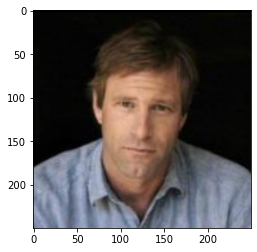

Hello Human, You Look Like a Clumber spaniel


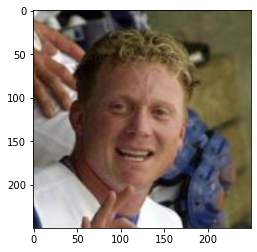

Hello Human, You Look Like a Dogue de bordeaux


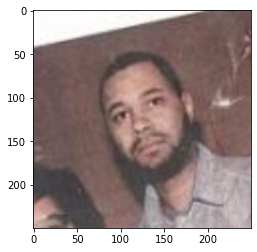

Hey, your image is not valid. please try with a valid image.


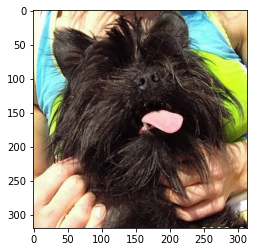

Hello Dog, You Look Like a Affenpinscher


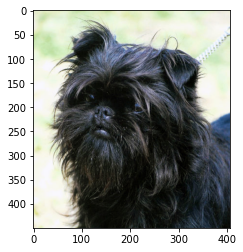

Hello Dog, You Look Like a Affenpinscher


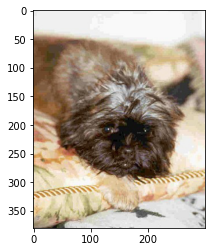

Hello Dog, You Look Like a Affenpinscher


In [54]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

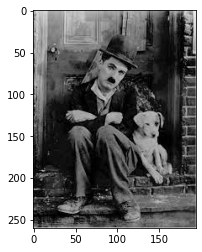

Hey, your image is not valid. please try with a valid image.


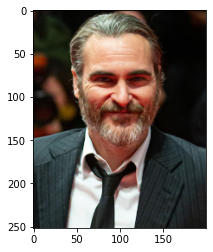

Hello Human, You Look Like a Boston terrier


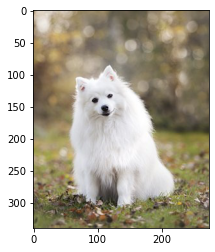

Hello Dog, You Look Like a American eskimo dog


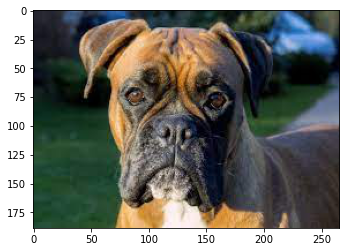

Hello Dog, You Look Like a Bullmastiff


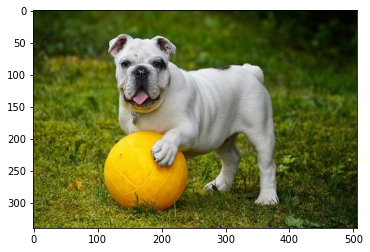

Hello Dog, You Look Like a Bulldog


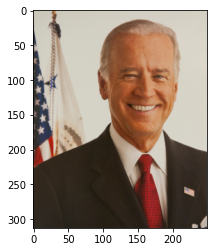

Hello Human, You Look Like a Norwich terrier


In [55]:
## suggested code, below
for file in glob('testImages/*'):
    run_app(file)